   nPregnancy  plasmaGlu  bPressure  tricepsSkin   insulin       BMI  \
0    0.639947   0.848324   0.149641     0.907270 -0.692891  0.204013   
1   -0.844885  -1.123396  -0.160546     0.530902 -0.692891 -0.684422   
2    1.233880   1.943724  -0.263941    -1.288212 -0.692891 -1.103255   
3   -0.844885  -0.998208  -0.160546     0.154533  0.123302 -0.494043   
4   -1.141852   0.504055  -1.504687     0.907270  0.765836  1.409746   

   pedigree       age  
0  0.468492  1.425995  
1 -0.365061 -0.190672  
2  0.604397 -0.105584  
3 -0.920763 -1.041549  
4  5.484909 -0.020496  
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231

C is: 0.01
10-fold cross-validaiton accuracy is: 0.7630382775119617
10-fold cross-validaiton pre

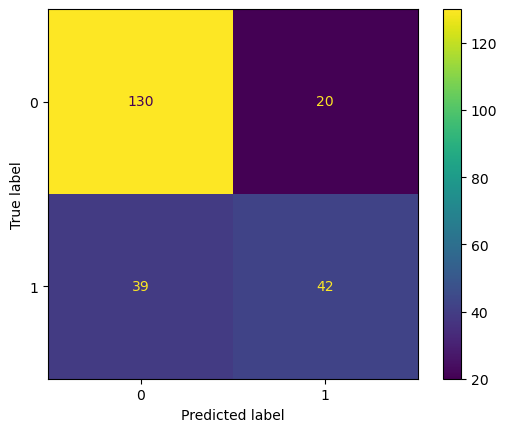

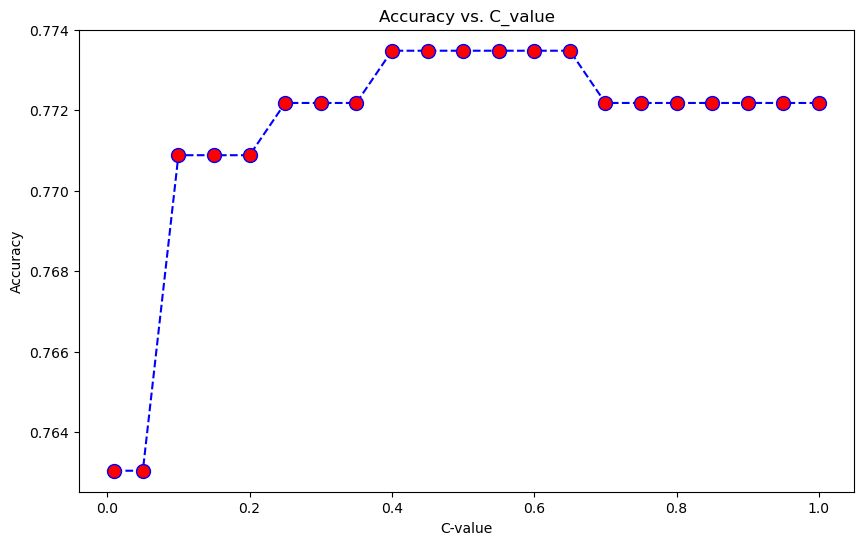

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

df = pd.read_csv('C:/Users/samhi/Downloads/pima-indians-diabetes.csv', index_col=0)
feature_names = df.columns[:-1]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('target', axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df.drop('target', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
print(df_feat.head())

# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['target'], test_size=0.3, stratify=df['target'], random_state=42)

# Apply Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=2) # Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.

clf = clf.fit(x_train, y_train)

# Predictions
predictions_test = clf.predict(x_test)
class_names = [0, 1]

# Report Overall Accuracy, precision, recall, F1-score
class_names = list(map(str, clf.classes_))
print(metrics.classification_report(
    y_true=y_test,
    y_pred=predictions_test,
    target_names=class_names,
    zero_division=0
))

# Optimize k
from sklearn.model_selection import cross_val_score
cross_validation_accuracies = []
cross_validation_precisions = []
cross_validation_recalls = []
cross_validation_f1scores = []
cross_validation_roc_auc = []
C_values = (0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 
            0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0)
for i in C_values:
    print('C is:', i)
    clf = LogisticRegression(C=i)
    scores = cross_val_score(clf, df_feat, df['target'], cv=10, scoring='accuracy')
    score = scores.mean()
    cross_validation_accuracies.append(score)
    print('10-fold cross-validaiton accuracy is:', score)

    precision = cross_val_score(clf, df_feat, df['target'], cv=10, scoring='precision').mean()
    cross_validation_precisions.append(precision)
    print('10-fold cross-validaiton precision is:', precision)

    recall = cross_val_score(clf, df_feat, df['target'], cv=10, scoring='recall').mean()
    cross_validation_recalls.append(recall)
    print('10-fold cross-validaiton recall is:', recall)

    f1score = cross_val_score(clf, df_feat, df['target'], cv=10, scoring='f1').mean()
    cross_validation_f1scores.append(f1score)
    print('10-fold cross-validaiton f1score is:', f1score)

    roc_auc = cross_val_score(clf, df_feat, df['target'], cv=10, scoring='roc_auc').mean()
    cross_validation_roc_auc.append(roc_auc)
    print('10-fold cross-validaiton roc_auc is:', roc_auc)

# Create a graph that shows the overall accuracy for different values of the hyperparameter.
plt.figure(figsize=(10,6))
plt.plot(C_values, cross_validation_accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. C_value')
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

